### 5. risk_factorhttps://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data

In [40]:
import pandas as pd
risk_factor = pd.read_csv("5.data_cardiovascular_risk.csv")
risk_factor.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### DecisionTree

--------------------------------------------------
最佳depth= {'max_depth': 3}
Turning_KNN.score =  0.8525073746312685
DecisionTree_model.score =  0.8525073746312685
precision_score= 0.6
recall_score= 0.0297029702970297
f1_score= 0.056603773584905655
--------------------------------------------------


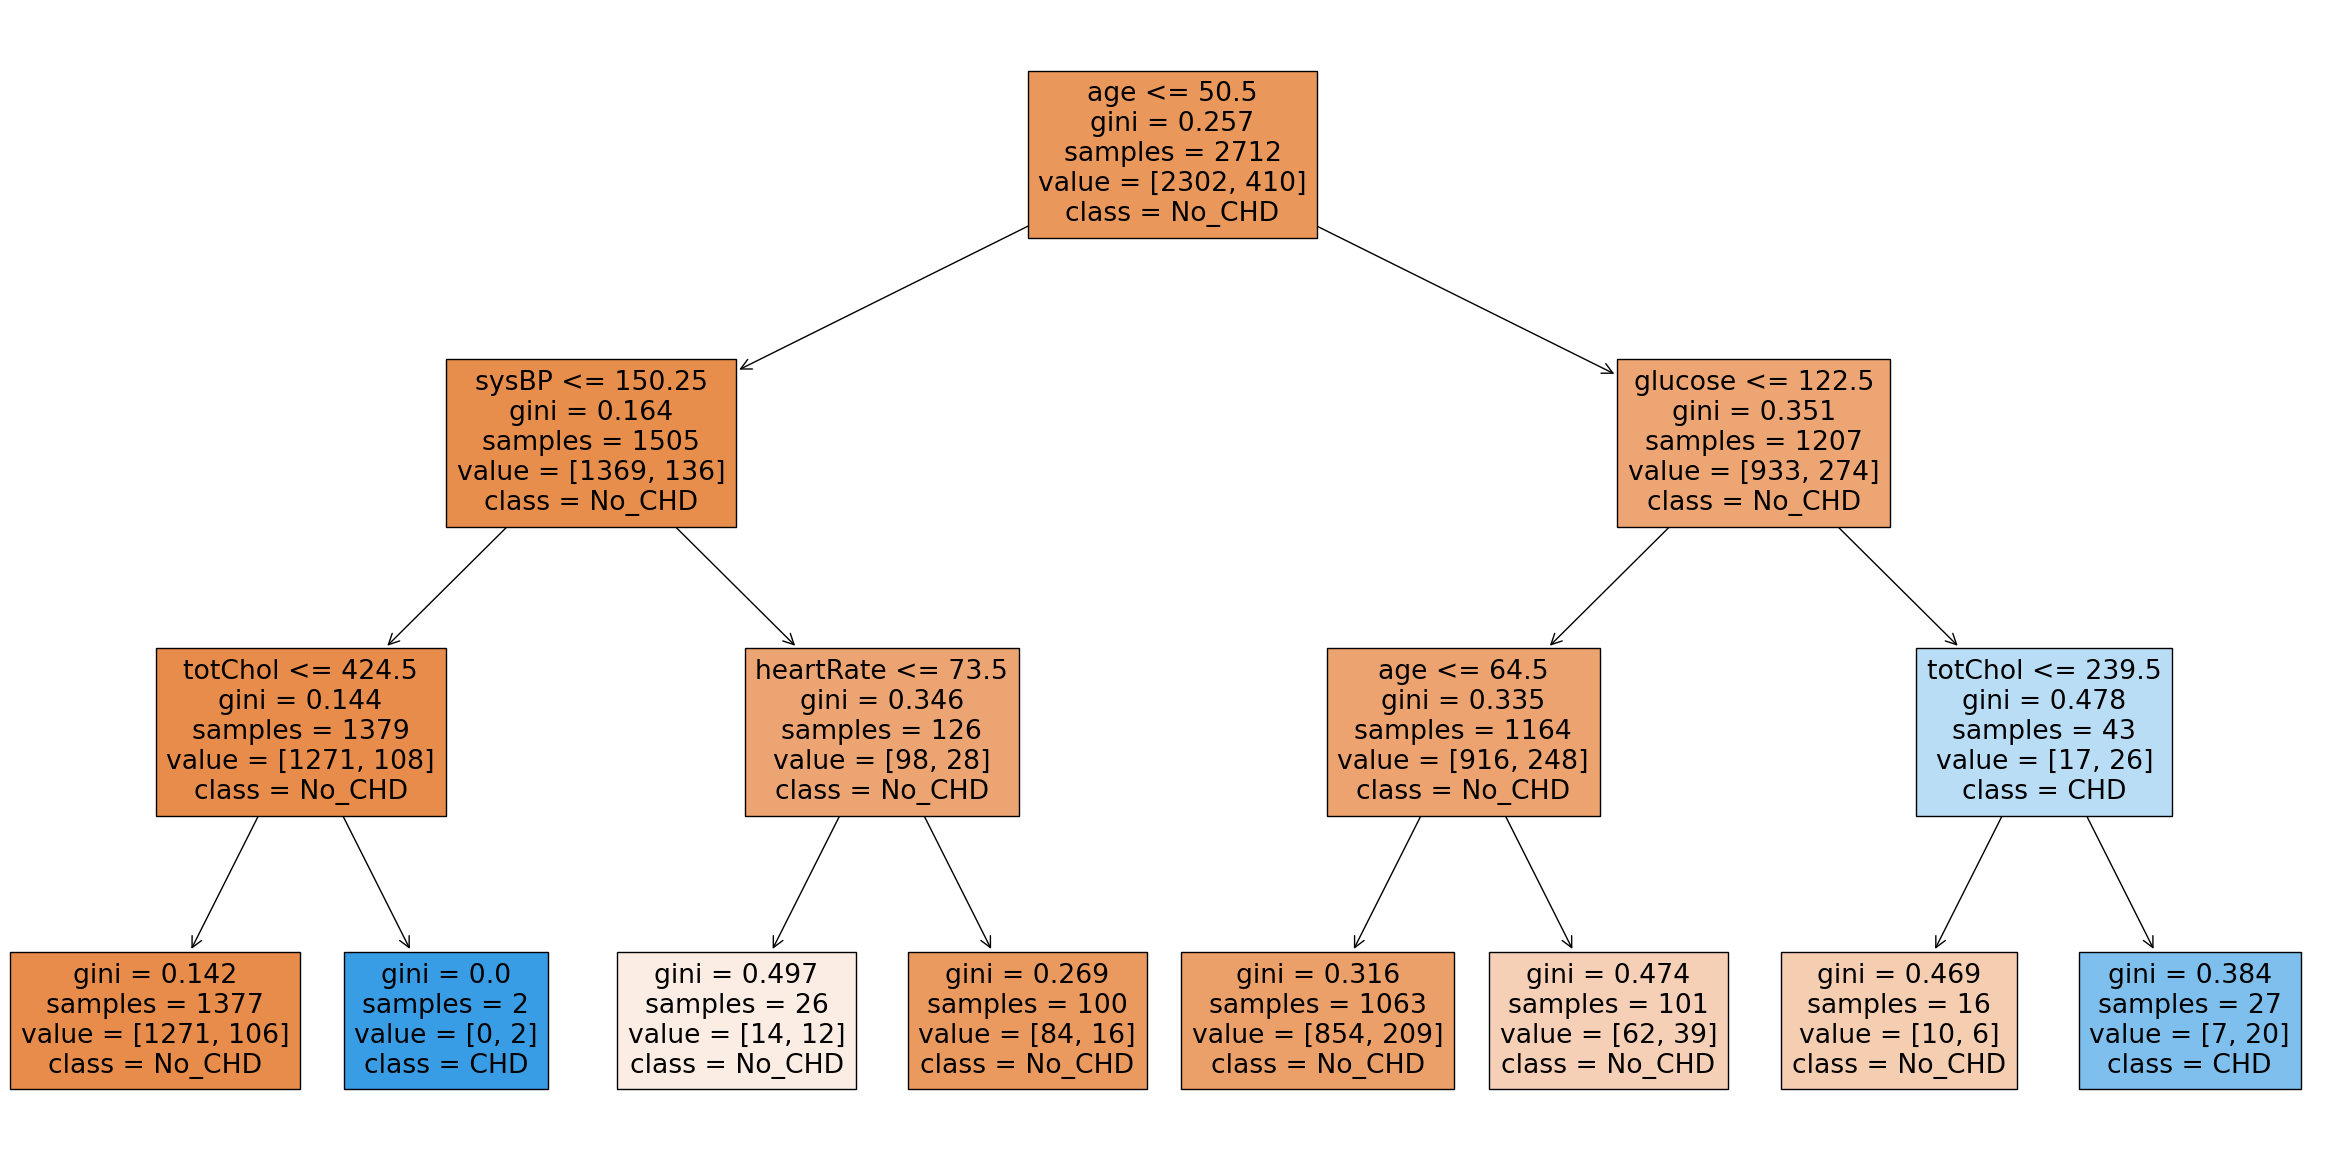

In [11]:
#前處理保留六個生理數據數值型欄位，sex及is_smoking欄位轉換成數值分類，1,2或0,1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,plot_tree

risk_factor = pd.read_csv("5.data_cardiovascular_risk.csv")
# print(risk_factor.head(10))
# print(risk_factor.tail(10))

# #資料簡介
# print(risk_factor.shape)
# print(risk_factor.info())


# #每個欄位字串空值的索引值位置判斷，皆沒有
# print("id:",risk_factor["id"][risk_factor["id"]==""].index)
# print("age:",risk_factor["age"][risk_factor["age"]==""].index)
# print("education:",risk_factor["education"][risk_factor["education"]==""].index)
# print("sex:",risk_factor["sex"][risk_factor["sex"]==""].index)
# print("is_smoking:",risk_factor["is_smoking"][risk_factor["is_smoking"]==""].index)
# print("cigsPerDay:",risk_factor["cigsPerDay"][risk_factor["cigsPerDay"]==""].index)
# print("BPMeds:",risk_factor["BPMeds"][risk_factor["BPMeds"]==""].index)
# print("prevalentStroke:",risk_factor["prevalentStroke"][risk_factor["prevalentStroke"]==""].index)
# print("prevalentHyp:",risk_factor["prevalentHyp"][risk_factor["prevalentHyp"]==""].index)
# print("diabetes:",risk_factor["diabetes"][risk_factor["diabetes"]==""].index)
# print("totChol:",risk_factor["totChol"][risk_factor["totChol"]==""].index)
# print("sysBP:",risk_factor["sysBP"][risk_factor["sysBP"]==""].index)
# print("diaBP:",risk_factor["diaBP"][risk_factor["diaBP"]==""].index)
# print("BMI:",risk_factor["BMI"][risk_factor["BMI"]==""].index)
# print("heartRate:",risk_factor["heartRate"][risk_factor["heartRate"]==""].index)
# print("glucose:",risk_factor["glucose"][risk_factor["glucose"]==""].index)
# print("TenYearCHD:",risk_factor["TenYearCHD"][risk_factor["TenYearCHD"]==""].index)

# #查看後有空值欄位的空值索引值位置判斷
# print("education:",risk_factor["education"][risk_factor["education"].isna()].index,sep="\n")
# print("cigsPerDay:",risk_factor["cigsPerDay"][risk_factor["cigsPerDay"].isna()].index,sep="\n")
# print("BPMeds:",risk_factor["BPMeds"][risk_factor["BPMeds"].isna()].index,sep="\n")
# print("totChol:",risk_factor["totChol"][risk_factor["totChol"].isna()].index,sep="\n")
# print("BMI:",risk_factor["BMI"][risk_factor["BMI"].isna()].index,sep="\n")
# print("heartRate:",risk_factor["heartRate"][risk_factor["heartRate"].isna()].index,sep="\n")
# print("glucose:",risk_factor["glucose"][risk_factor["glucose"].isna()].index,sep="\n")

# #各欄位的空值筆數判斷
# print("各欄位的空值筆數判斷",risk_factor.isna().sum())

# #查看相異值：dtype=object(是否有文字和數值同時存在或者單純只有文字)或dtype=float(是否有Nan存在，或是只有浮點數)
# #所有型態(object, float, int)都可以看有沒有雜訊(包含錯誤值、離群值)
# print("id:",risk_factor["id"].unique(),sep="\n") #[   0    1    2 ... 3387 3388 3389]
# print("age:",np.sort(risk_factor["age"].unique()),sep="\n")
# print("education:",np.sort(risk_factor["education"].unique()),sep="\n") #浮點數與nan
# print("sex:",np.sort(risk_factor["sex"].unique()),sep="\n") #['F' 'M']
# print("is_smoking:",np.sort(risk_factor["is_smoking"].unique()),sep="\n") #['YES' 'NO']
# print("cigsPerDay:",np.sort(risk_factor["cigsPerDay"].unique()),sep="\n") #浮點數與nan
# print("BPMeds:",np.sort(risk_factor["BPMeds"].unique()),sep="\n") #[ 0. nan  1.]
# print("prevalentStroke:",risk_factor["prevalentStroke"].unique(),sep="\n") #[0 1]
# print("prevalentHyp:",risk_factor["prevalentHyp"].unique(),sep="\n") #[0 1]
# print("diabetes:",risk_factor["diabetes"].unique(),sep="\n") #[0 1]
# print("totChol:",np.sort(risk_factor["totChol"].unique()),sep="\n") #浮點數與nan
# print("sysBP:",np.sort(risk_factor["sysBP"].unique()),sep="\n") #浮點數
# print("diaBP:",np.sort(risk_factor["diaBP"].unique()),sep="\n") #浮點數
# print("BMI:",list(np.sort(risk_factor["BMI"].unique())),sep="\n") #浮點數與nan
# print("heartRate:",np.sort(risk_factor["heartRate"].unique()),sep="\n") #浮點數與nan
# print("glucose:",np.sort(risk_factor["glucose"].unique()),sep="\n") #浮點數與nan
# print("TenYearCHD:",risk_factor["TenYearCHD"].unique(),sep="\n") #[0 1]
# for i in risk_factor.columns:
#     print("%s原始相異值:\n%s" %(i,np.sort(risk_factor[i].unique())))
#     print()
# print("-"*50)


#處理空值，並且再次查看相異值
#education填入平均值
edu_mean = (risk_factor["education"][risk_factor["education"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["education"].isna(),"education"] = edu_mean
#print("education填入平均值後相異值:",np.sort(risk_factor["education"].unique()),sep="\n")

#cigsPerDay填入平均值
cigsPerDay_mean = (risk_factor["cigsPerDay"][risk_factor["cigsPerDay"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["cigsPerDay"].isna(),"cigsPerDay"] = cigsPerDay_mean
#print("\ncigsPerDay填入平均值後相異值:",np.sort(risk_factor["cigsPerDay"].unique()),sep="\n")

#BPMeds(是否正在服用降血壓藥物)填入眾數
risk_factor["BPMeds"].value_counts()  # 數值為0.0-->有3246筆, 數值為1.0-->有100筆
risk_factor.loc[risk_factor["BPMeds"].isna(),"BPMeds"] = 0.0 #填入眾數0.0
#print("\nBPMeds填入眾數後相異值:",risk_factor["BPMeds"].unique(),sep="\n")

#totChol填入平均值
totChol_mean = (risk_factor["totChol"][risk_factor["totChol"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["totChol"].isna(),"totChol"] = totChol_mean
#print("\ntotChol填入平均值後相異值:",np.sort(risk_factor["totChol"].unique()),sep="\n")

#BMI:填入平均值
BMI_mean = (risk_factor["BMI"][risk_factor["BMI"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["BMI"].isna(),"BMI"] = BMI_mean
#print("\nBMI填入平均值後相異值:",np.sort(risk_factor["BMI"].unique()),sep="\n")

#heartRate:填入平均值
heartRate_mean = (risk_factor["heartRate"][risk_factor["heartRate"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["heartRate"].isna(),"heartRate"] = heartRate_mean
#print("\nheartRate填入平均值後相異值:",np.sort(risk_factor["heartRate"].unique()),sep="\n")

#glucose:填入平均值
glucose_mean = (risk_factor["glucose"][risk_factor["glucose"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["glucose"].isna(),"glucose"] = glucose_mean
#print("\nglucose填入平均值後相異值:",np.sort(risk_factor["glucose"].unique()),sep="\n")
print("-"*50)




# #資料型態轉換_map，刪除id及TenYearCHD欄位
sex_map = {"M":1,"F":2}
is_smoking_map = {"NO":0,"YES":1}
risk_factor["sex"] = risk_factor["sex"].map(sex_map)
risk_factor["is_smoking"] = risk_factor["is_smoking"].map(is_smoking_map)

x = risk_factor.drop(["id","TenYearCHD"], axis=1)
y = risk_factor["TenYearCHD"]

# print(risk_factor.corr()) #看資料前處理完成後的 df中各欄位相關係數

#進行Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# print("x_train:",x_train,sep = "\n")
# print("x_test:",x_test,sep = "\n")
# print("y_train:",y_train,sep = "\n")
# print("y_test:",y_test,sep = "\n")

#使用GridSearchCV搜尋最佳depth
params = {'max_depth': [3, 5, 7, 9, 11]}
bestCV = GridSearchCV(DecisionTreeClassifier(),params)
bestCV.fit(x_train, y_train)
print("最佳depth=",bestCV.best_params_)
print("Turning_KNN.score = ",bestCV.score(x_test,y_test))

#建DecisionTree模型然後做預測
DecisionTree_model = DecisionTreeClassifier(max_depth=bestCV.best_params_["max_depth"])
DecisionTree_model.fit(x_train, y_train)
prediction = DecisionTree_model.predict(x_test)
#print(prediction)
print("DecisionTree_model.score = ",DecisionTree_model.score(x_test,y_test))

#使用Confusion Matrix評估建立的模型
print("precision_score=",metrics.precision_score(y_test, prediction))
print("recall_score=",metrics.recall_score(y_test, prediction))
print("f1_score=",metrics.f1_score(y_test, prediction))
print("-"*50)

#繪Tree
plt.figure(figsize=(30,15))
plot_tree(DecisionTree_model, filled=True, feature_names=x.columns.to_list(),class_names=["No_CHD","CHD"])
plt.show()